In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


# how agreeable is each article

In [4]:
df

,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN
1,2024-08-09 23:28:38,7,282,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,strongly disagree,Somewhat disagree,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Strongly agree,NaN,NaN,NaN
2,2024-08-10 16:03:37,9,269,100,True,Agree,Email,Academic,NaN,5.0,...,strongly disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,We do not need ti reach AGI to already have so...,NaN,NaN
3,2024-08-11 22:38:37,7,286,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,Somewhat agree,strongly disagree,Strongly agree,That it will not affect people's daily lives. ...,NaN,NaN
4,2024-08-12 1:16:00,13,1058,100,True,Agree,LinkedIn DM,Industry,NaN,5.0,...,Somewhat disagree,Neither agree nor disagree,Somewhat agree,strongly disagree,Neither agree nor disagree,Somewhat disagree,Strongly agree,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2024-08-22 10:38:58,0,262,17,False,Agree,Email,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,2024-08-23 4:35:11,9,289,72,False,Agree,Email,Academic,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2024-08-29 6:34:31,11,2624,72,False,Agree,Email,Academic,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2024-08-27 3:46:15,0,578941,17,False,Agree,Discord/Slack/other DM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['reading'] = df['reading'].replace(7, "Control")
df['reading'] = df['reading'].replace(9, "Russel")
df['reading'] = df['reading'].replace(11, "Joy")
df['reading'] = df['reading'].replace(13, "Aschenbrenner")
# get Q15 and df[reading] into a new dataframe
df_agreement = df[['Q15', 'reading']]

In [6]:
# drop the rows with NaN values in Q15
df_agreement = df_agreement.dropna(subset=['Q15'])

# drop the rows with 0 in reading
df_agreement = df_agreement[df_agreement['reading'] != 0]

In [7]:
# replace the values in Q15 with numerical values (1-5)
df_agreement['Q15'] = df_agreement['Q15'].replace({
    'Strongly disagree': 1,
    'Somewhat disagree': 2,
    'Neither agree nor disagree': 3,
    'Somewhat agree': 4,
    'Strongly agree': 5
})

In [8]:
df_agreement['reading'].value_counts()

Control          23
Aschenbrenner    17
Joy              12
Russel           11
Name: reading, dtype: int64

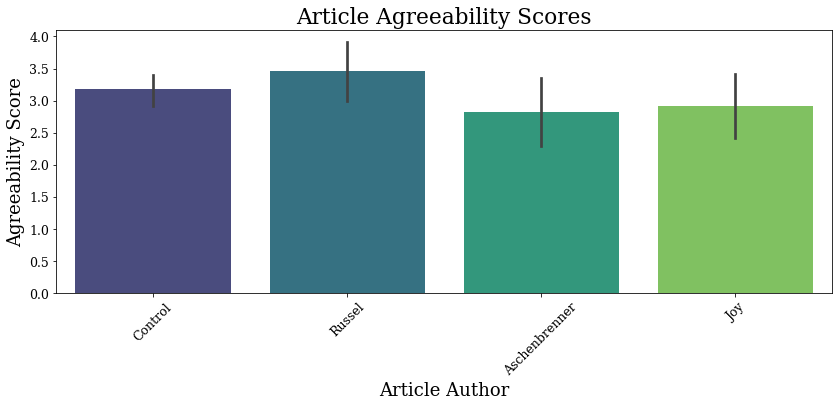

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out NaN values and sort by 'number'
# df_filtered = df_agreement.dropna(subset=['Q15']).sort_values('reading')

plt.figure(figsize=(12, 6))
sns.barplot(x='reading', y='Q15', data=df_agreement, palette='viridis')

plt.title('Article Agreeability Scores')
plt.xlabel('Article Author')
plt.ylabel('Agreeability Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figs/article_agreeability.pdf")

plt.show()

In [10]:
df['Q1']

0      Industry
1      Industry
2      Academic
3      Industry
4      Industry
         ...   
101         NaN
102    Academic
103    Academic
104         NaN
105    Academic
Name: Q1, Length: 106, dtype: object